In [ ]:
import numpy as np
from phimal_utilities.analysis import load_tensorboard

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='white')

In [26]:
df_deepmod = load_tensorboard('runs/deepmod/')
df_logprob = load_tensorboard('runs/logprob/')
df_lstsq = load_tensorboard('runs/lstsq/')

In [27]:
df_logprob.keys()

Index(['Total_loss', 'MSE_0', 'Regression_0', 'L1_0', 'coeff_0_0', 'coeff_0_1',
       'coeff_0_2', 'coeff_0_3', 'coeff_0_4', 'coeff_0_5', 'coeff_0_6',
       'coeff_0_7', 'coeff_0_8', 'coeff_0_9', 'coeff_0_10', 'coeff_0_11',
       'scaled_coeff_0_0', 'scaled_coeff_0_1', 'scaled_coeff_0_2',
       'scaled_coeff_0_3', 'scaled_coeff_0_4', 'scaled_coeff_0_5',
       'scaled_coeff_0_6', 'scaled_coeff_0_7', 'scaled_coeff_0_8',
       'scaled_coeff_0_9', 'scaled_coeff_0_10', 'scaled_coeff_0_11',
       'log_likelihood', 'll_fit', 'lstsq_solution_0', 'lstsq_solution_1',
       'lstsq_solution_2', 'lstsq_solution_3', 'lstsq_solution_4',
       'lstsq_solution_5', 'lstsq_solution_6', 'lstsq_solution_7',
       'lstsq_solution_8', 'lstsq_solution_9', 'lstsq_solution_10',
       'lstsq_solution_11', 'mae_library_0', 'mae_library_1', 'mae_library_2',
       'mae_library_3', 'mae_library_4', 'mae_library_5', 'mae_library_6',
       'mae_library_7', 'mae_library_8', 'mae_library_9', 'mae_library_10

In [75]:
coeff_keys = [key for key in df_logprob.keys() if key[:5]=='coeff']
lst_keys = [key for key in df_logprob.keys() if key[:5]=='lstsq']
mae_keys = [key for key in df_logprob.keys() if key[:3]=='mae']

In [34]:
true_coeffs = np.zeros((1, 12))
true_coeffs[0, 2] = 0.1
true_coeffs[0, 5] = -1.0

In [35]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

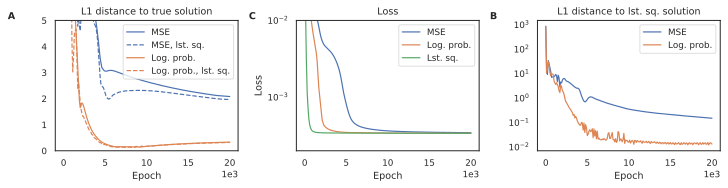

In [61]:
%config InlineBackend.figure_format = 'svg'

fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=3, constrained_layout=True) #5.5 is official width

# Left panel
ax = axes[0]

ax.plot(df_deepmod.index, np.sum(np.abs(df_deepmod[coeff_keys] - true_coeffs), axis=1), label='MSE', color=colors[0])
ax.plot(df_deepmod.index, np.sum(np.abs(df_deepmod[lst_keys] - true_coeffs), axis=1), label='MSE, lst. sq.', color=colors[0], linestyle='--')

ax.plot(df_deepmod.index, np.sum(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1), label='Log. prob.', color=colors[1])
ax.plot(df_deepmod.index, np.sum(np.abs(df_logprob[lst_keys] - true_coeffs), axis=1), label='Log. prob., lst. sq.', color=colors[1], linestyle='--')

ax.legend()
ax.set_ylim([0, 5])
ax.set_title('L1 distance to true solution')
ax.set_xlabel('Epoch')
ax.text(-0.26, 1.01, 'A', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))

# Right Panel
ax = axes[1]
ax.plot(df_logprob.index, df_deepmod['Regression_0'] + df_deepmod['MSE_0'], label='MSE')
ax.plot(df_logprob.index, df_logprob['Regression_0'] + df_logprob['MSE_0'], label='Log. prob.')
ax.plot(df_logprob.index, df_lstsq['Regression_0'] + df_lstsq['MSE_0'], label='Lst. sq.')

ax.legend()
ax.set_yscale('log')
ax.set_title('Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.set_ylim([2e-4, 1e-2])


# Left panel
ax = axes[2]
ax.plot(df_deepmod.index, np.sum(np.abs(df_deepmod[coeff_keys].to_numpy() - df_deepmod[lst_keys].to_numpy()), axis=1), label='MSE')
ax.plot(df_logprob.index, np.sum(np.abs(df_logprob[coeff_keys].to_numpy() - df_logprob[lst_keys].to_numpy()), axis=1), label='Log. prob.')
ax.legend()

ax.set_yscale('log')
ax.set_title('L1 distance to lst. sq. solution')
ax.set_xlabel('Epoch')
ax.text(-0.26, 1.01, 'B', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))



fig.show()
plt.savefig('figure_2.pdf')

(0, 30)

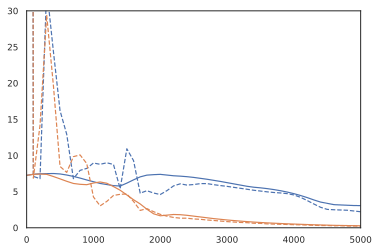

In [44]:
plt.plot(df_deepmod.index, np.sum(np.abs(df_deepmod[coeff_keys] - true_coeffs), axis=1), label='MSE', color=colors[0])
plt.plot(df_deepmod.index, np.sum(np.abs(df_deepmod[lst_keys] - true_coeffs), axis=1), label='MSE, lst. sq.', color=colors[0], linestyle='--')

plt.plot(df_deepmod.index, np.sum(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1), label='Log. prob.', color=colors[1])
plt.plot(df_deepmod.index, np.sum(np.abs(df_logprob[lst_keys] - true_coeffs), axis=1), label='Log. prob., lst. sq.', color=colors[1], linestyle='--')

plt.xlim([0, 5000])
plt.ylim([0, 30])

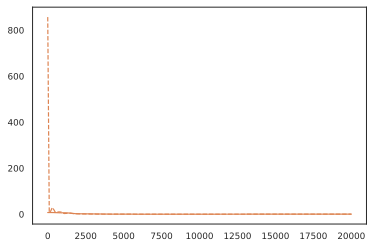

In [40]:
plt.plot(df_deepmod.index, np.sum(np.abs(df_logprob[coeff_keys] - true_coeffs), axis=1), label='Log. prob.', color=colors[1])
plt.plot(df_deepmod.index, np.sum(np.abs(df_logprob[lst_keys] - true_coeffs), axis=1), label='Log. prob., lst. sq.', color=colors[1], linestyle='--')

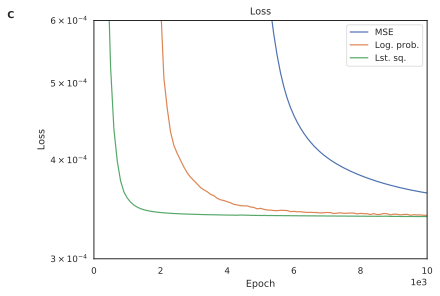

In [51]:

fig, ax = plt.subplots(constrained_layout=True) #5.5 is official width

ax.plot(df_logprob.index, df_deepmod['Regression_0'] + df_deepmod['MSE_0'], label='MSE')
ax.plot(df_logprob.index, df_logprob['Regression_0'] + df_logprob['MSE_0'], label='Log. prob.')
ax.plot(df_logprob.index, df_lstsq['Regression_0'] + df_lstsq['MSE_0'], label='Lst. sq.')

ax.legend()
ax.set_xlim([0, 10000])
ax.set_ylim([3e-4, 6e-4])
ax.set_yscale('log')
ax.set_title('Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))

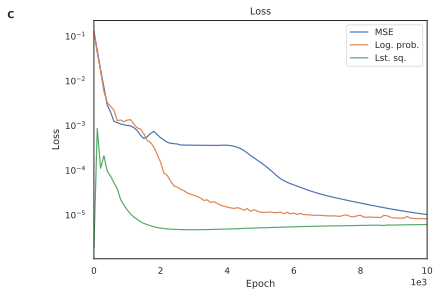

In [55]:

fig, ax = plt.subplots(constrained_layout=True) #5.5 is official width

ax.plot(df_logprob.index, df_deepmod['Regression_0'], label='MSE')
ax.plot(df_logprob.index, df_logprob['Regression_0'], label='Log. prob.')
ax.plot(df_logprob.index, df_lstsq['Regression_0'], label='Lst. sq.')

ax.legend()
ax.set_xlim([0, 10000])
#ax.set_ylim([3e-4, 6e-4])
ax.set_yscale('log')
ax.set_title('Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))

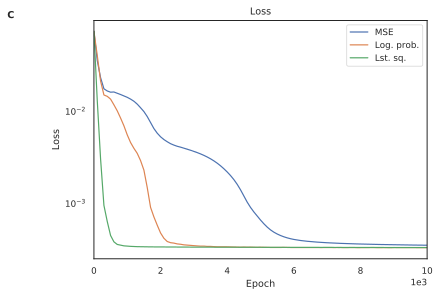

In [56]:

fig, ax = plt.subplots(constrained_layout=True) #5.5 is official width

ax.plot(df_logprob.index, df_deepmod['MSE_0'], label='MSE')
ax.plot(df_logprob.index, df_logprob['MSE_0'], label='Log. prob.')
ax.plot(df_logprob.index, df_lstsq['MSE_0'], label='Lst. sq.')

ax.legend()
ax.set_xlim([0, 10000])
#ax.set_ylim([3e-4, 6e-4])
ax.set_yscale('log')
ax.set_title('Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))

In [66]:
df_logprob = load_tensorboard('runs/deepmod/')
df_new = load_tensorboard('runs/deepmod_rand/')

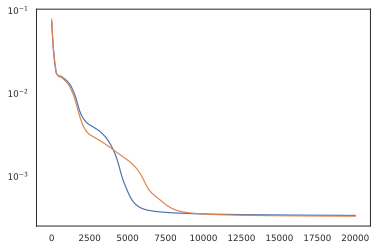

In [73]:
plt.semilogy(df_logprob['MSE_0'])
plt.semilogy(df_new['MSE_0'])

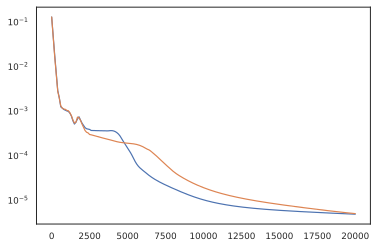

In [74]:
plt.semilogy(df_logprob['Regression_0'])
plt.semilogy(df_new['Regression_0'])

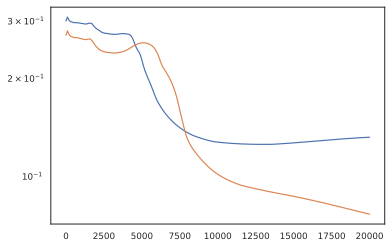

In [81]:
plt.semilogy(np.mean(df_logprob[mae_keys], axis=1))
plt.semilogy(np.mean(df_new[mae_keys], axis=1))

# Multiple runs

In [2]:
import numpy as np
from phimal_utilities.analysis import load_tensorboard
from os import listdir
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='paper', style='white')


In [37]:
def collect_runs(ID, true_coeffs):
    files = [file for file in listdir('runs_new') if file[:len(ID)] == ID]
    files.sort()
    print(files)
    dfs = [load_tensorboard('runs_new/' + file + '/') for file in files]
    df_plot = pd.DataFrame(index=dfs[0].index)
    
    # Setting MSE and Reg properties
    MSE = np.log10(np.stack([df['MSE_0'] for df in dfs], axis=1)) # take mean of log ipv log of mean for visualization purposes
    Reg = np.log10(np.stack([df['Regression_0'] for df in dfs], axis=1))
    Total = np.log10(np.stack([df['Regression_0'] + df['MSE_0'] for df in dfs], axis=1))
    
    df_plot['MSE_mean'] = np.mean(MSE, axis=1)
    df_plot['MSE_std'] = np.std(MSE, axis=1)
    df_plot['Reg_mean'] = np.mean(Reg, axis=1)
    df_plot['Reg_std'] = np.std(Reg, axis=1)
    df_plot['total_mean'] = np.mean(Total, axis=1)
    df_plot['total_std'] = np.std(Total, axis=1)
    
    # Coefficient error 
    coeff_keys = [key for key in dfs[0].keys() if key[:6]=='scaled']
    coeff_errors = np.log10(np.stack([np.mean(np.abs(df[coeff_keys] - true_coeffs), axis=1) for df in dfs], axis=1))
    df_plot['Coeff_mean'] = np.mean(coeff_errors, axis=1)
    df_plot['Coeff_std'] = np.std(coeff_errors, axis=1)
    
    # Least squares error
    lst_keys = [key for key in dfs[0].keys() if key[:len('lstsq_solution_normed')]=='lstsq_solution_normed']
    if len(lst_keys) != 0:
        # Coeff Errors 
        coeff_errors = np.stack([np.mean(np.abs(df[lst_keys] - true_coeffs), axis=1) for df in dfs], axis=1) #mean over coeffs
        df_plot['lstsq_coeff_mean'] = np.mean(coeff_errors, axis=1) # means over runs
        df_plot['lstsq_coeff_std'] = np.std(coeff_errors, axis=1)
        
        coeff_errors = np.stack([np.mean(np.abs(df[coeff_keys] - true_coeffs), axis=1) for df in dfs], axis=1) #mean over coeffs
        df_plot['coeff_mean_real'] = np.mean(coeff_errors, axis=1) # means over runs
        df_plot['coeff_std_real'] = np.std(coeff_errors, axis=1)
        
        # l1 distance 
        coeff_errors = np.log10(np.stack([np.mean(np.abs(df[lst_keys].to_numpy() - df[coeff_keys].to_numpy()), axis=1) for df in dfs], axis=1)) #mean over coeffs
        df_plot['l1_dist_mean'] = np.mean(coeff_errors, axis=1) # means over runs
        df_plot['l1_dist_std'] = np.std(coeff_errors, axis=1)    
        
    return df_plot

In [38]:
from phimal_utilities.data import Dataset
from phimal_utilities.data.burgers import BurgersDelta

In [39]:
true_coeffs = np.zeros((1, 12))
true_coeffs[0, 2] = 0.1
true_coeffs[0, 5] = -1.0

In [40]:
# Making grid
x = np.linspace(-3, 4, 100)
t = np.linspace(0.5, 5.0, 50)
x_grid, t_grid = np.meshgrid(x, t, indexing='ij')

# Making data
dataset = Dataset(BurgersDelta, v=0.1, A=1.0)
theta = dataset.library(x_grid.reshape(-1, 1), t_grid.reshape(-1, 1), poly_order=2, deriv_order=3)
dt = dataset.time_deriv(x_grid.reshape(-1, 1), t_grid.reshape(-1, 1))

In [41]:
true_coeffs_scaled = true_coeffs * np.linalg.norm(theta, axis=0) / np.linalg.norm(dt)

In [42]:
df_deepmod = collect_runs('deepmod_run', true_coeffs=true_coeffs_scaled)
df_logprob = collect_runs('deepmod_logprob_run', true_coeffs=true_coeffs_scaled)
df_lstsq = collect_runs('deepmod_logprob_lstsq_run', true_coeffs=true_coeffs_scaled)

['deepmod_run_0', 'deepmod_run_1', 'deepmod_run_2', 'deepmod_run_3', 'deepmod_run_4']
['deepmod_logprob_run_0', 'deepmod_logprob_run_1', 'deepmod_logprob_run_2', 'deepmod_logprob_run_3', 'deepmod_logprob_run_4']
['deepmod_logprob_lstsq_run_0', 'deepmod_logprob_lstsq_run_1', 'deepmod_logprob_lstsq_run_2', 'deepmod_logprob_lstsq_run_3', 'deepmod_logprob_lstsq_run_4']


In [9]:
df_deepmod.keys()

Index(['MSE_mean', 'MSE_std', 'Reg_mean', 'Reg_std', 'total_mean', 'total_std',
       'Coeff_mean', 'Coeff_std', 'lstsq_coeff_mean', 'lstsq_coeff_std',
       'l1_dist_mean', 'l1_dist_std'],
      dtype='object')

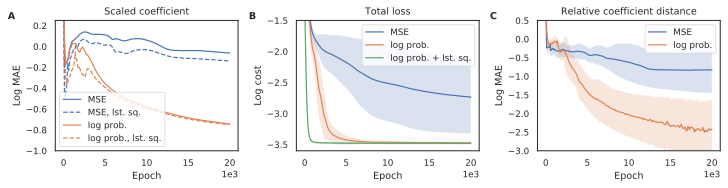

In [8]:
%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=3, constrained_layout=True) #5.5 is official width
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Left panel
ax = axes[0]
#ax.fill_between(df_deepmod.index, df_deepmod['Coeff_mean']-df_deepmod['Coeff_std'], df_deepmod['Coeff_mean']+df_deepmod['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['Coeff_mean'], label='MSE', color=colors[0])
#ax.fill_between(df_deepmod.index, df_deepmod['lstsq_coeff_mean']-df_deepmod['lstsq_coeff_std'], df_deepmod['lstsq_coeff_mean']+df_deepmod['lstsq_coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['lstsq_coeff_mean'], label='MSE, lst. sq.', linestyle='--', color=colors[0])

#ax.fill_between(df_deepmod.index, df_logprob['Coeff_mean']-df_logprob['Coeff_std'], df_logprob['Coeff_mean']+df_logprob['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['Coeff_mean'], label='log prob.', color=colors[1])
ax.plot(df_deepmod.index, df_logprob['lstsq_coeff_mean'], label='log prob., lst. sq.', linestyle='--', color=colors[1])


ax.legend()
ax.set_ylim([-1, 0.25])
ax.set_title('Scaled coefficient')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.text(-0.26, 1.01, 'A', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))


# Middle
ax = axes[1]

ax.fill_between(df_deepmod.index, df_deepmod['total_mean']-df_deepmod['total_std'], df_deepmod['total_mean']+df_deepmod['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['total_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['total_mean']-df_logprob['total_std'], df_logprob['total_mean']+df_logprob['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['total_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['total_mean']-df_lstsq['total_std'], df_lstsq['total_mean']+df_lstsq['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['total_mean'], label='log prob. + lst. sq.')


ax.legend()
ax.set_title('Total loss')
ax.set_ylabel('Log cost')
ax.set_xlabel('Epoch')
ax.text(-0.26, 1.01, 'B', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.set_ylim([-3.6, -1.5])

# Right
ax = axes[2]

ax.fill_between(df_deepmod.index, df_deepmod['l1_dist_mean']-df_deepmod['l1_dist_std'], df_deepmod['l1_dist_mean']+df_deepmod['l1_dist_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['l1_dist_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['l1_dist_mean']-df_logprob['l1_dist_std'], df_logprob['l1_dist_mean']+df_logprob['l1_dist_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['l1_dist_mean'], label='log prob.')

ax.legend(loc='upper right')
ax.set_ylim([-3, 0.5])
#ax.set_yscale('log')
ax.set_title('Relative coefficient distance')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))

fig.show()
plt.savefig('figure_2.pdf')

In [ ]:
# Left panel
ax = axes[0]
#ax.fill_between(df_deepmod.index, df_deepmod['Coeff_mean']-df_deepmod['Coeff_std'], df_deepmod['Coeff_mean']+df_deepmod['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['Coeff_mean'], label='MSE', color=colors[0])
#ax.fill_between(df_deepmod.index, df_deepmod['lstsq_coeff_mean']-df_deepmod['lstsq_coeff_std'], df_deepmod['lstsq_coeff_mean']+df_deepmod['lstsq_coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['lstsq_coeff_mean'], label='MSE, lst. sq.', linestyle='--', color=colors[0])

#ax.fill_between(df_deepmod.index, df_logprob['Coeff_mean']-df_logprob['Coeff_std'], df_logprob['Coeff_mean']+df_logprob['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['Coeff_mean'], label='log prob.', color=colors[1])
ax.plot(df_deepmod.index, df_logprob['lstsq_coeff_mean'], label='log prob., lst. sq.', linestyle='--', color=colors[1])


ax.legend()
ax.set_ylim([-1, 0.25])
ax.set_title('Scaled coefficient')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.text(-0.26, 1.01, 'A', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))


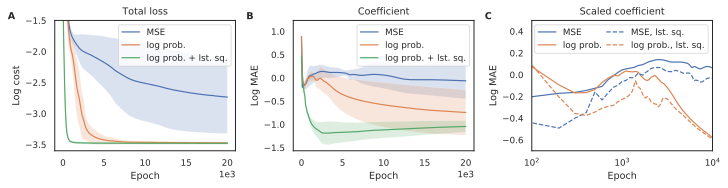

In [23]:
%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=3, constrained_layout=True) #5.5 is official width
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Left
ax = axes[0]

ax.fill_between(df_deepmod.index, df_deepmod['total_mean']-df_deepmod['total_std'], df_deepmod['total_mean']+df_deepmod['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['total_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['total_mean']-df_logprob['total_std'], df_logprob['total_mean']+df_logprob['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['total_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['total_mean']-df_lstsq['total_std'], df_lstsq['total_mean']+df_lstsq['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['total_mean'], label='log prob. + lst. sq.')


ax.legend()
ax.set_title('Total loss')
ax.set_ylabel('Log cost')
ax.set_xlabel('Epoch')
ax.text(-0.26, 1.01, 'A', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.set_ylim([-3.6, -1.5])

# Middle
ax = axes[1]

ax.fill_between(df_deepmod.index, df_deepmod['Coeff_mean']-df_deepmod['Coeff_std'], df_deepmod['Coeff_mean']+df_deepmod['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['Coeff_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['Coeff_mean']-df_logprob['Coeff_std'], df_logprob['Coeff_mean']+df_logprob['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['Coeff_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['Coeff_mean']-df_lstsq['Coeff_std'], df_lstsq['Coeff_mean']+df_lstsq['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['Coeff_mean'], label='log prob. + lst. sq.')

ax.legend()
#plt.ylim([-2, 0.5])
ax.set_title('Coefficient')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.text(-0.26, 1.01, 'B', transform=ax.transAxes, weight='bold')


# Right panel
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax = axes[2]

#ax.fill_between(df_deepmod.index, df_deepmod['Coeff_mean']-df_deepmod['Coeff_std'], df_deepmod['Coeff_mean']+df_deepmod['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['Coeff_mean'], label='MSE', color=colors[0])
ax.plot(df_deepmod.index, df_logprob['Coeff_mean'], label='log prob.', color=colors[1])
#ax.fill_between(df_deepmod.index, df_deepmod['lstsq_coeff_mean']-df_deepmod['lstsq_coeff_std'], df_deepmod['lstsq_coeff_mean']+df_deepmod['lstsq_coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['lstsq_coeff_mean'], label='MSE, lst. sq.', linestyle='--', color=colors[0])

#ax.fill_between(df_deepmod.index, df_logprob['Coeff_mean']-df_logprob['Coeff_std'], df_logprob['Coeff_mean']+df_logprob['Coeff_std'], alpha=0.2)

ax.plot(df_deepmod.index, df_logprob['lstsq_coeff_mean'], label='log prob., lst. sq.', linestyle='--', color=colors[1])


ax.legend(loc='upper right', ncol=2, columnspacing=0.5)
ax.set_ylim([-0.7, 0.5])
ax.set_xlim([100, 1e4])
ax.set_title('Scaled coefficient')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
#ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.set_xscale('log')

fig.show()
plt.savefig('figure_2.pdf')


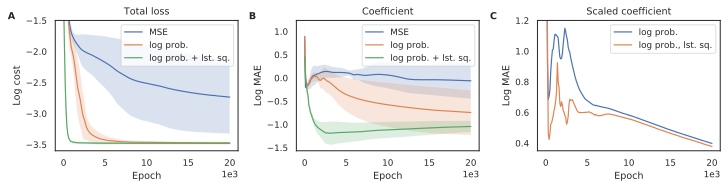

In [46]:
%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=3, constrained_layout=True) #5.5 is official width
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Left
ax = axes[0]

ax.fill_between(df_deepmod.index, df_deepmod['total_mean']-df_deepmod['total_std'], df_deepmod['total_mean']+df_deepmod['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['total_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['total_mean']-df_logprob['total_std'], df_logprob['total_mean']+df_logprob['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['total_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['total_mean']-df_lstsq['total_std'], df_lstsq['total_mean']+df_lstsq['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['total_mean'], label='log prob. + lst. sq.')


ax.legend()
ax.set_title('Total loss')
ax.set_ylabel('Log cost')
ax.set_xlabel('Epoch')
ax.text(-0.26, 1.01, 'A', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.set_ylim([-3.6, -1.5])

# Middle
ax = axes[1]

ax.fill_between(df_deepmod.index, df_deepmod['Coeff_mean']-df_deepmod['Coeff_std'], df_deepmod['Coeff_mean']+df_deepmod['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['Coeff_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['Coeff_mean']-df_logprob['Coeff_std'], df_logprob['Coeff_mean']+df_logprob['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['Coeff_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['Coeff_mean']-df_lstsq['Coeff_std'], df_lstsq['Coeff_mean']+df_lstsq['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['Coeff_mean'], label='log prob. + lst. sq.')

ax.legend()
#plt.ylim([-2, 0.5])
ax.set_title('Coefficient')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.text(-0.26, 1.01, 'B', transform=ax.transAxes, weight='bold')


# Right panel
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax = axes[2]



ax.plot(df_deepmod.index, df_logprob['coeff_mean_real'], label='log prob.')


ax.plot(df_deepmod.index, df_logprob['lstsq_coeff_mean'], label='log prob., lst. sq.')


ax.legend(loc='upper right', ncol=1, columnspacing=0.5)

ax.set_ylim([0.35, 1.2])
ax.set_title('Scaled coefficient')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))

fig.show()
plt.savefig('figure_2.pdf')


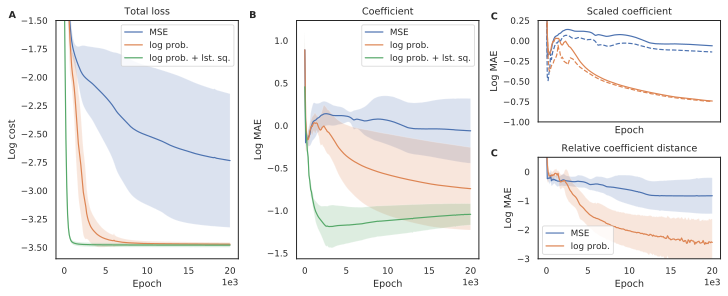

In [99]:
%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

fig = plt.figure(figsize=(10, 4), constrained_layout=True)
gs = fig.add_gridspec(2, 3)


# Left
ax = fig.add_subplot(gs[:, 0])

ax.fill_between(df_deepmod.index, df_deepmod['total_mean']-df_deepmod['total_std'], df_deepmod['total_mean']+df_deepmod['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['total_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['total_mean']-df_logprob['total_std'], df_logprob['total_mean']+df_logprob['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['total_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['total_mean']-df_lstsq['total_std'], df_lstsq['total_mean']+df_lstsq['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['total_mean'], label='log prob. + lst. sq.')


ax.legend()
ax.set_title('Total loss')
ax.set_ylabel('Log cost')
ax.set_xlabel('Epoch')
ax.text(-0.26, 1.01, 'A', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.set_ylim([-3.6, -1.5])

# Middle
ax = fig.add_subplot(gs[:, 1])

ax.fill_between(df_deepmod.index, df_deepmod['Coeff_mean']-df_deepmod['Coeff_std'], df_deepmod['Coeff_mean']+df_deepmod['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['Coeff_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['Coeff_mean']-df_logprob['Coeff_std'], df_logprob['Coeff_mean']+df_logprob['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['Coeff_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['Coeff_mean']-df_lstsq['Coeff_std'], df_lstsq['Coeff_mean']+df_lstsq['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['Coeff_mean'], label='log prob. + lst. sq.')

ax.legend()
#plt.ylim([-2, 0.5])
ax.set_title('Coefficient')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.text(-0.26, 1.01, 'B', transform=ax.transAxes, weight='bold')


# Right panel
ax = fig.add_subplot(gs[0, 2])
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

#ax.fill_between(df_deepmod.index, df_deepmod['Coeff_mean']-df_deepmod['Coeff_std'], df_deepmod['Coeff_mean']+df_deepmod['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['Coeff_mean'], label='MSE', color=colors[0])
#ax.fill_between(df_deepmod.index, df_deepmod['lstsq_coeff_mean']-df_deepmod['lstsq_coeff_std'], df_deepmod['lstsq_coeff_mean']+df_deepmod['lstsq_coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['lstsq_coeff_mean'], label='MSE, lst. sq.', linestyle='--', color=colors[0])

#ax.fill_between(df_deepmod.index, df_logprob['Coeff_mean']-df_logprob['Coeff_std'], df_logprob['Coeff_mean']+df_logprob['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['Coeff_mean'], label='log prob.', color=colors[1])
ax.plot(df_deepmod.index, df_logprob['lstsq_coeff_mean'], label='log prob., lst. sq.', linestyle='--', color=colors[1])


#ax.legend()
ax.set_ylim([-1, 0.25])
ax.set_title('Scaled coefficient')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.set_xticks([])
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))


# Right panel
ax = fig.add_subplot(gs[1, 2])
ax.fill_between(df_deepmod.index, df_deepmod['l1_dist_mean']-df_deepmod['l1_dist_std'], df_deepmod['l1_dist_mean']+df_deepmod['l1_dist_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['l1_dist_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['l1_dist_mean']-df_logprob['l1_dist_std'], df_logprob['l1_dist_mean']+df_logprob['l1_dist_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['l1_dist_mean'], label='log prob.')

ax.legend(loc='lower left')
ax.set_ylim([-3, 0.5])
#ax.set_yscale('log')
ax.set_title('Relative coefficient distance')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))


fig.show()
plt.savefig('figure_2.pdf')


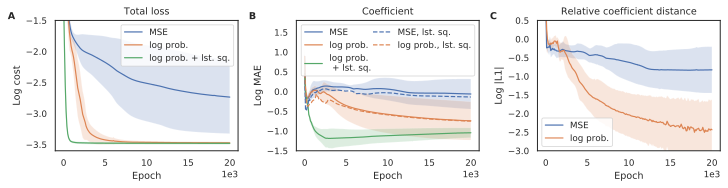

In [122]:
%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=3, constrained_layout=True) #5.5 is official width
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Left
ax = axes[0]

ax.fill_between(df_deepmod.index, df_deepmod['total_mean']-df_deepmod['total_std'], df_deepmod['total_mean']+df_deepmod['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['total_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['total_mean']-df_logprob['total_std'], df_logprob['total_mean']+df_logprob['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['total_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['total_mean']-df_lstsq['total_std'], df_lstsq['total_mean']+df_lstsq['total_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['total_mean'], label='log prob. + lst. sq.')


ax.legend()
ax.set_title('Total loss')
ax.set_ylabel('Log cost')
ax.set_xlabel('Epoch')
ax.text(-0.26, 1.01, 'A', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.set_ylim([-3.6, -1.5])

# Middle
ax = axes[1]

ax.fill_between(df_deepmod.index, df_deepmod['Coeff_mean']-df_deepmod['Coeff_std'], df_deepmod['Coeff_mean']+df_deepmod['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['Coeff_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['Coeff_mean']-df_logprob['Coeff_std'], df_logprob['Coeff_mean']+df_logprob['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['Coeff_mean'], label='log prob.')

ax.fill_between(df_deepmod.index, df_lstsq['Coeff_mean']-df_lstsq['Coeff_std'], df_lstsq['Coeff_mean']+df_lstsq['Coeff_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_lstsq['Coeff_mean'], label='log prob. \n + lst. sq.')


ax.plot(df_deepmod.index, df_deepmod['lstsq_coeff_mean'], label='MSE, lst. sq.', linestyle='--', color=colors[0])
ax.plot(df_deepmod.index, df_logprob['lstsq_coeff_mean'], label='log prob., lst. sq.', linestyle='--', color=colors[1])


ax.legend(ncol=2, columnspacing=0.2)
ax.set_ylim([-1.5, 1.8])
ax.set_title('Coefficient')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log MAE')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
ax.text(-0.26, 1.01, 'B', transform=ax.transAxes, weight='bold')


# Right panel
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
ax = axes[2]
ax.fill_between(df_deepmod.index, df_deepmod['l1_dist_mean']-df_deepmod['l1_dist_std'], df_deepmod['l1_dist_mean']+df_deepmod['l1_dist_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_deepmod['l1_dist_mean'], label='MSE')

ax.fill_between(df_deepmod.index, df_logprob['l1_dist_mean']-df_logprob['l1_dist_std'], df_logprob['l1_dist_mean']+df_logprob['l1_dist_std'], alpha=0.2)
ax.plot(df_deepmod.index, df_logprob['l1_dist_mean'], label='log prob.')

ax.legend(loc='lower left')
ax.set_ylim([-3, 0.5])
#ax.set_yscale('log')
ax.set_title('Relative coefficient distance')
ax.set_xlabel('Epoch')
ax.set_ylabel('Log |L1|')
ax.text(-0.26, 1.01, 'C', transform=ax.transAxes, weight='bold')
ax.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
fig.show()
plt.savefig('figure_2.pdf')


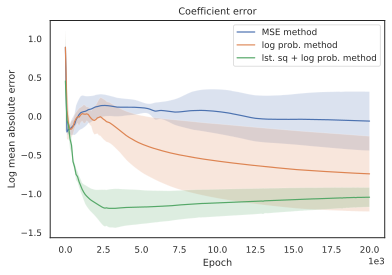

In [70]:
plt.fill_between(df_deepmod.index, df_deepmod['Coeff_mean']-df_deepmod['Coeff_std'], df_deepmod['Coeff_mean']+df_deepmod['Coeff_std'], alpha=0.2)
plt.plot(df_deepmod.index, df_deepmod['Coeff_mean'], label='MSE method')

plt.fill_between(df_deepmod.index, df_logprob['Coeff_mean']-df_logprob['Coeff_std'], df_logprob['Coeff_mean']+df_logprob['Coeff_std'], alpha=0.2)
plt.plot(df_deepmod.index, df_logprob['Coeff_mean'], label='log prob. method')

plt.fill_between(df_deepmod.index, df_lstsq['Coeff_mean']-df_lstsq['Coeff_std'], df_lstsq['Coeff_mean']+df_lstsq['Coeff_std'], alpha=0.2)
plt.plot(df_deepmod.index, df_lstsq['Coeff_mean'], label='lst. sq + log prob. method')

plt.legend()
#plt.ylim([-2, 0.5])
plt.title('Coefficient error')
plt.xlabel('Epoch')
plt.ylabel('Log mean absolute error')
plt.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))

In [87]:
df_lstsq['Coeff_std']

0        354.687839
100        0.704931
200        0.248453
300        0.037361
400        0.031125
            ...    
19600      0.021833
19700      0.021751
19800      0.021651
19900      0.021733
20000      0.021762
Name: Coeff_std, Length: 201, dtype: float64

In [88]:
df_lstsq['Coeff_mean']

0        215.599634
100        1.434860
200        0.486557
300        0.255860
400        0.227065
            ...    
19600      0.038793
19700      0.038739
19800      0.038825
19900      0.038685
20000      0.038739
Name: Coeff_mean, Length: 201, dtype: float64

In [106]:
df_lstsq['Coeff_mean'].argmin()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


5800

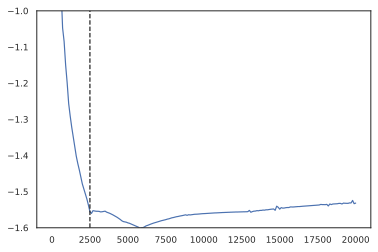

In [124]:
plt.plot(df_deepmod.index, df_lstsq['Coeff_mean'] , label='log prob.')
plt.ylim([-1.6, -1.0])
plt.axvline(2500, color='k', linestyle='--', label='Minimum')

In [65]:
np.log(2*np.pi*10**-4)

-7.372463305566837

In [ ]:
10-4, 10-6